# Importing needed libs

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import CubicSpline
from wordcloud import WordCloud

# Diving into the data

## First lookup 

### Loading the dataset

In [4]:
songs = pd.read_csv('tracks_features.csv')

### Displaying the head records

In [5]:
songs.head()

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02


### General informations about the data

In [6]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204025 entries, 0 to 1204024
Data columns (total 24 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   id                1204025 non-null  object 
 1   name              1204022 non-null  object 
 2   album             1204014 non-null  object 
 3   album_id          1204025 non-null  object 
 4   artists           1204025 non-null  object 
 5   artist_ids        1204025 non-null  object 
 6   track_number      1204025 non-null  int64  
 7   disc_number       1204025 non-null  int64  
 8   explicit          1204025 non-null  bool   
 9   danceability      1204025 non-null  float64
 10  energy            1204025 non-null  float64
 11  key               1204025 non-null  int64  
 12  loudness          1204025 non-null  float64
 13  mode              1204025 non-null  int64  
 14  speechiness       1204025 non-null  float64
 15  acousticness      1204025 non-null  float64
 16  

In [7]:
songs.columns

Index(['id', 'name', 'album', 'album_id', 'artists', 'artist_ids',
       'track_number', 'disc_number', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'year', 'release_date'],
      dtype='object')

### What do our columns correspond to ? 

#### Danceability
Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
#### Energy 
Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
#### Key
The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
#### Loudness
The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
#### Mode
Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
#### Speechiness 
Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
#### Acousticness 
A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
#### Instrumentalness
Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
#### Liveness
Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
#### Valence
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
#### Tempo 
The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
#### Time_signature
An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".


### Checking for null values and duplicates

In [8]:
percent_missing = songs.isna().sum() * 100 / len(songs)
missing_value_songs = pd.DataFrame({'column_name': songs.columns,
                                    'percent_missing': percent_missing.values})

missing_value_songs.sort_values(by='percent_missing', ascending=False)

,column_name,percent_missing
2,album,0.000914
1,name,0.000249
0,id,0.000000
13,mode,0.000000
22,year,0.000000
21,time_signature,0.000000
20,duration_ms,0.000000
19,tempo,0.000000
18,valence,0.000000
17,liveness,0.000000


**Observation**

- The only column that contains missing values is the 'Album' colum, which is normal since songs can be posted without being directly in an album. Since this analysis considers songs, we don't really care about 0.0009% missing values on this column. 

## Exploratory Data Analysis (EDA) 

Selecting only numerical columns

In [9]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
songs_numerics = songs.select_dtypes(include=numerics)
numerics_filtered = [col for col in songs_numerics if col not in ['track_number', 'disc_number', 'mode']]
songs_numerics_filtered = songs[numerics_filtered]

### Pairplot & Histograms

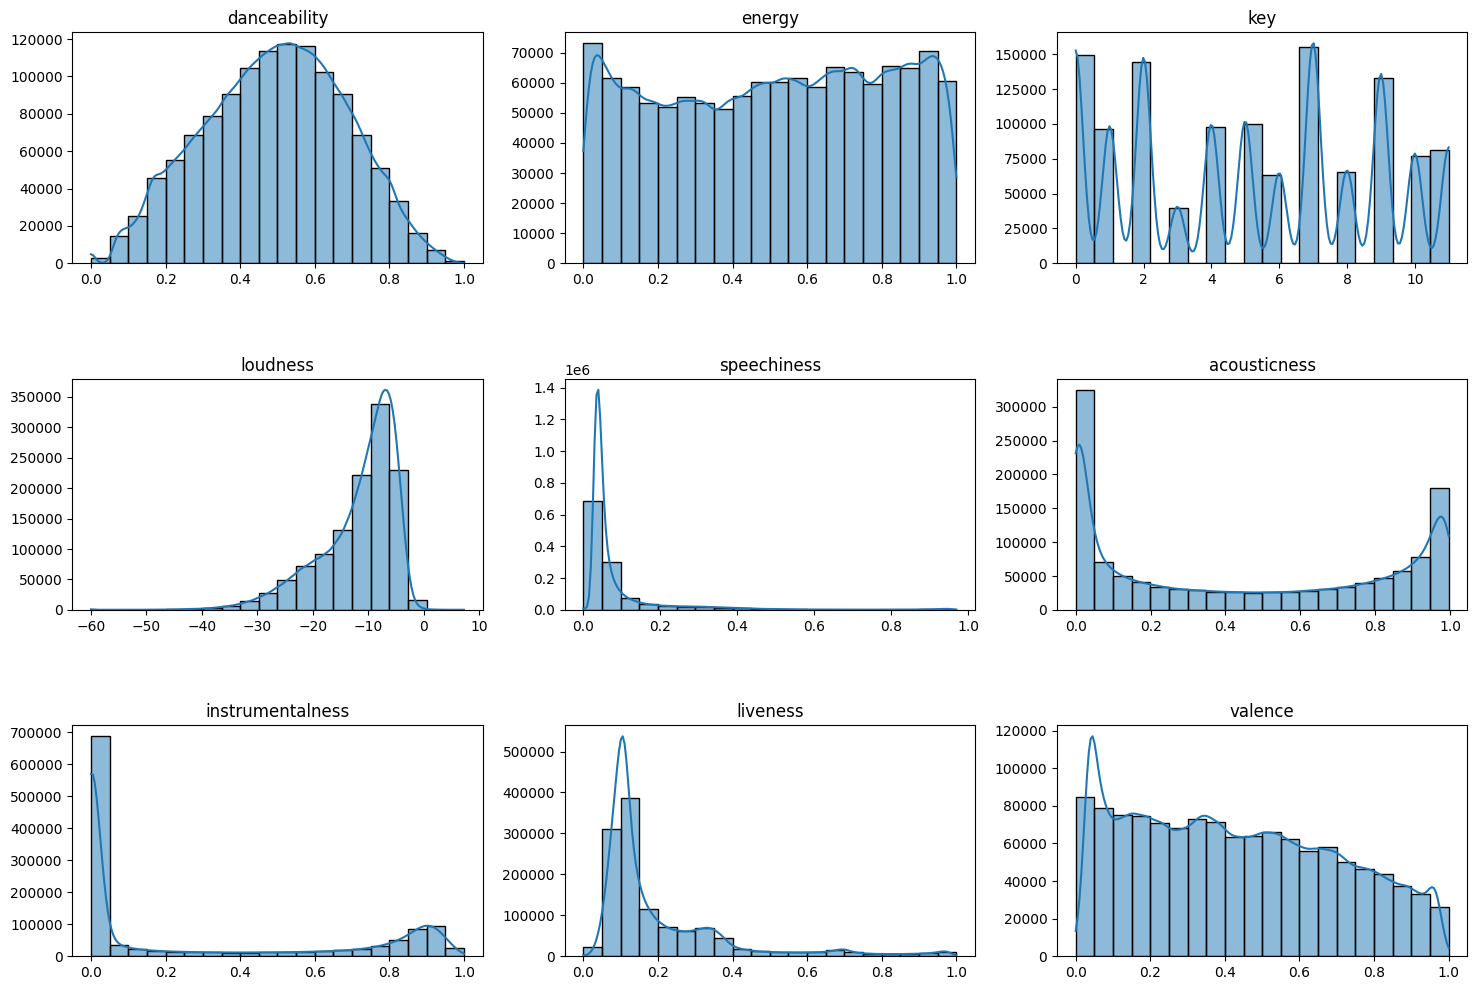

In [10]:
# Set up the figure
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
fig.subplots_adjust(hspace=0.5)

# Loop through each numeric feature and create histograms/KDEs
for ax, col in zip(axes.flatten(), songs_numerics_filtered.columns):
    sns.histplot(data=songs_numerics, x=col, kde=True, ax=ax, bins=20)
    ax.set_title(col)
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.show()

**Observation**

- We can see that there are a lot of songs that have 0 as acousticness or instumentalness. Else every numeric feature has a common logical distribution.

### Correlations between values

<Axes: >

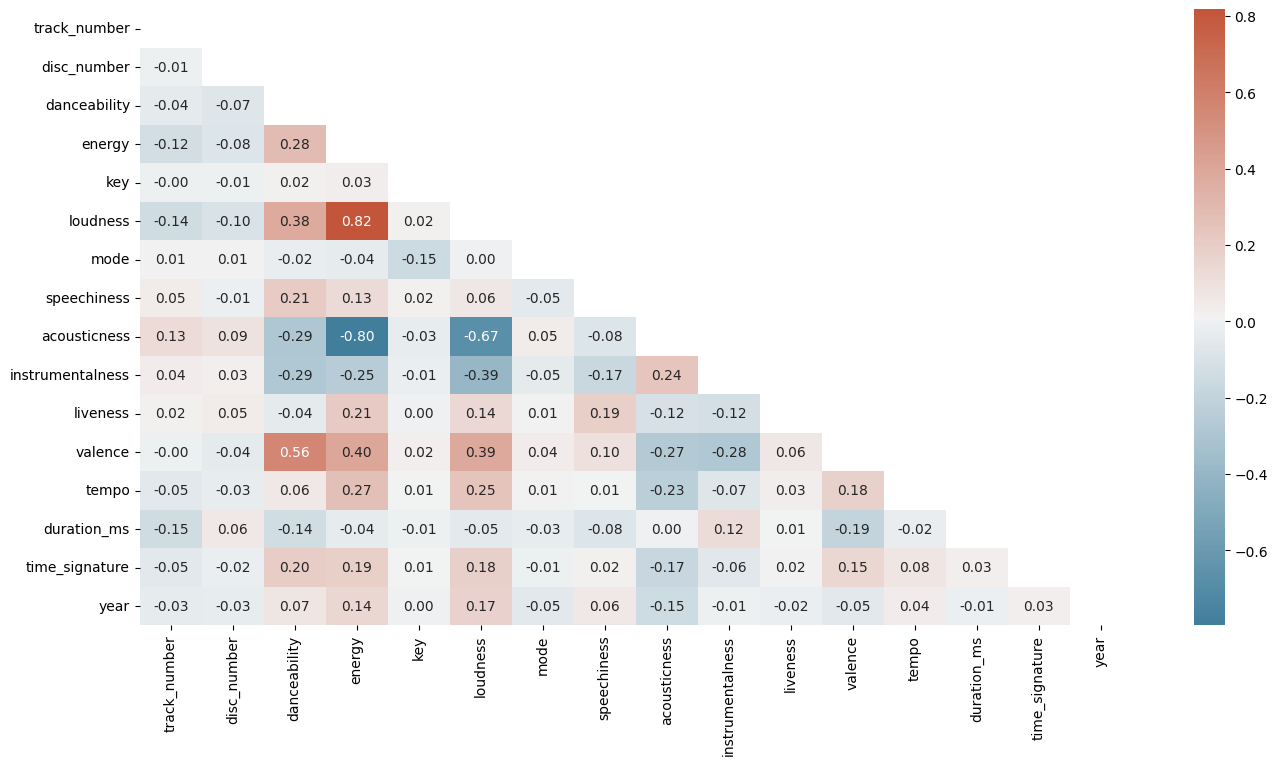

In [11]:
correlations = songs_numerics.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(correlations, dtype=bool))
plt.figure(figsize=(16,8))
sns.heatmap(songs_numerics.corr(), mask=mask, cmap=cmap, annot=True, fmt='.2f')

Let's extract extreme positive and negative correlations

In [12]:
# Extract extreme correlation values
extreme_correlations = correlations[abs(correlations) >= 0.3].stack().reset_index()
extreme_correlations.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Filter out perfect correlations (same feature) and redundant correlations
extreme_correlations = extreme_correlations.loc[extreme_correlations['Feature 1'] < extreme_correlations['Feature 2']]

# Create DataFrame for extreme correlations
extreme_correlations_df = pd.DataFrame(extreme_correlations)

# Display extreme correlations DataFrame
print("Highly correlated features:")
extreme_correlations_df.sort_values(by='Correlation', ascending=False)

Highly correlated features:


,Feature 1,Feature 2,Correlation
6,energy,loudness,0.817934
4,danceability,valence,0.563436
8,energy,valence,0.399531
15,loudness,valence,0.385005
3,danceability,loudness,0.378194
21,instrumentalness,loudness,-0.393037
19,acousticness,loudness,-0.671553
18,acousticness,energy,-0.796242


### Trends in songs features over time

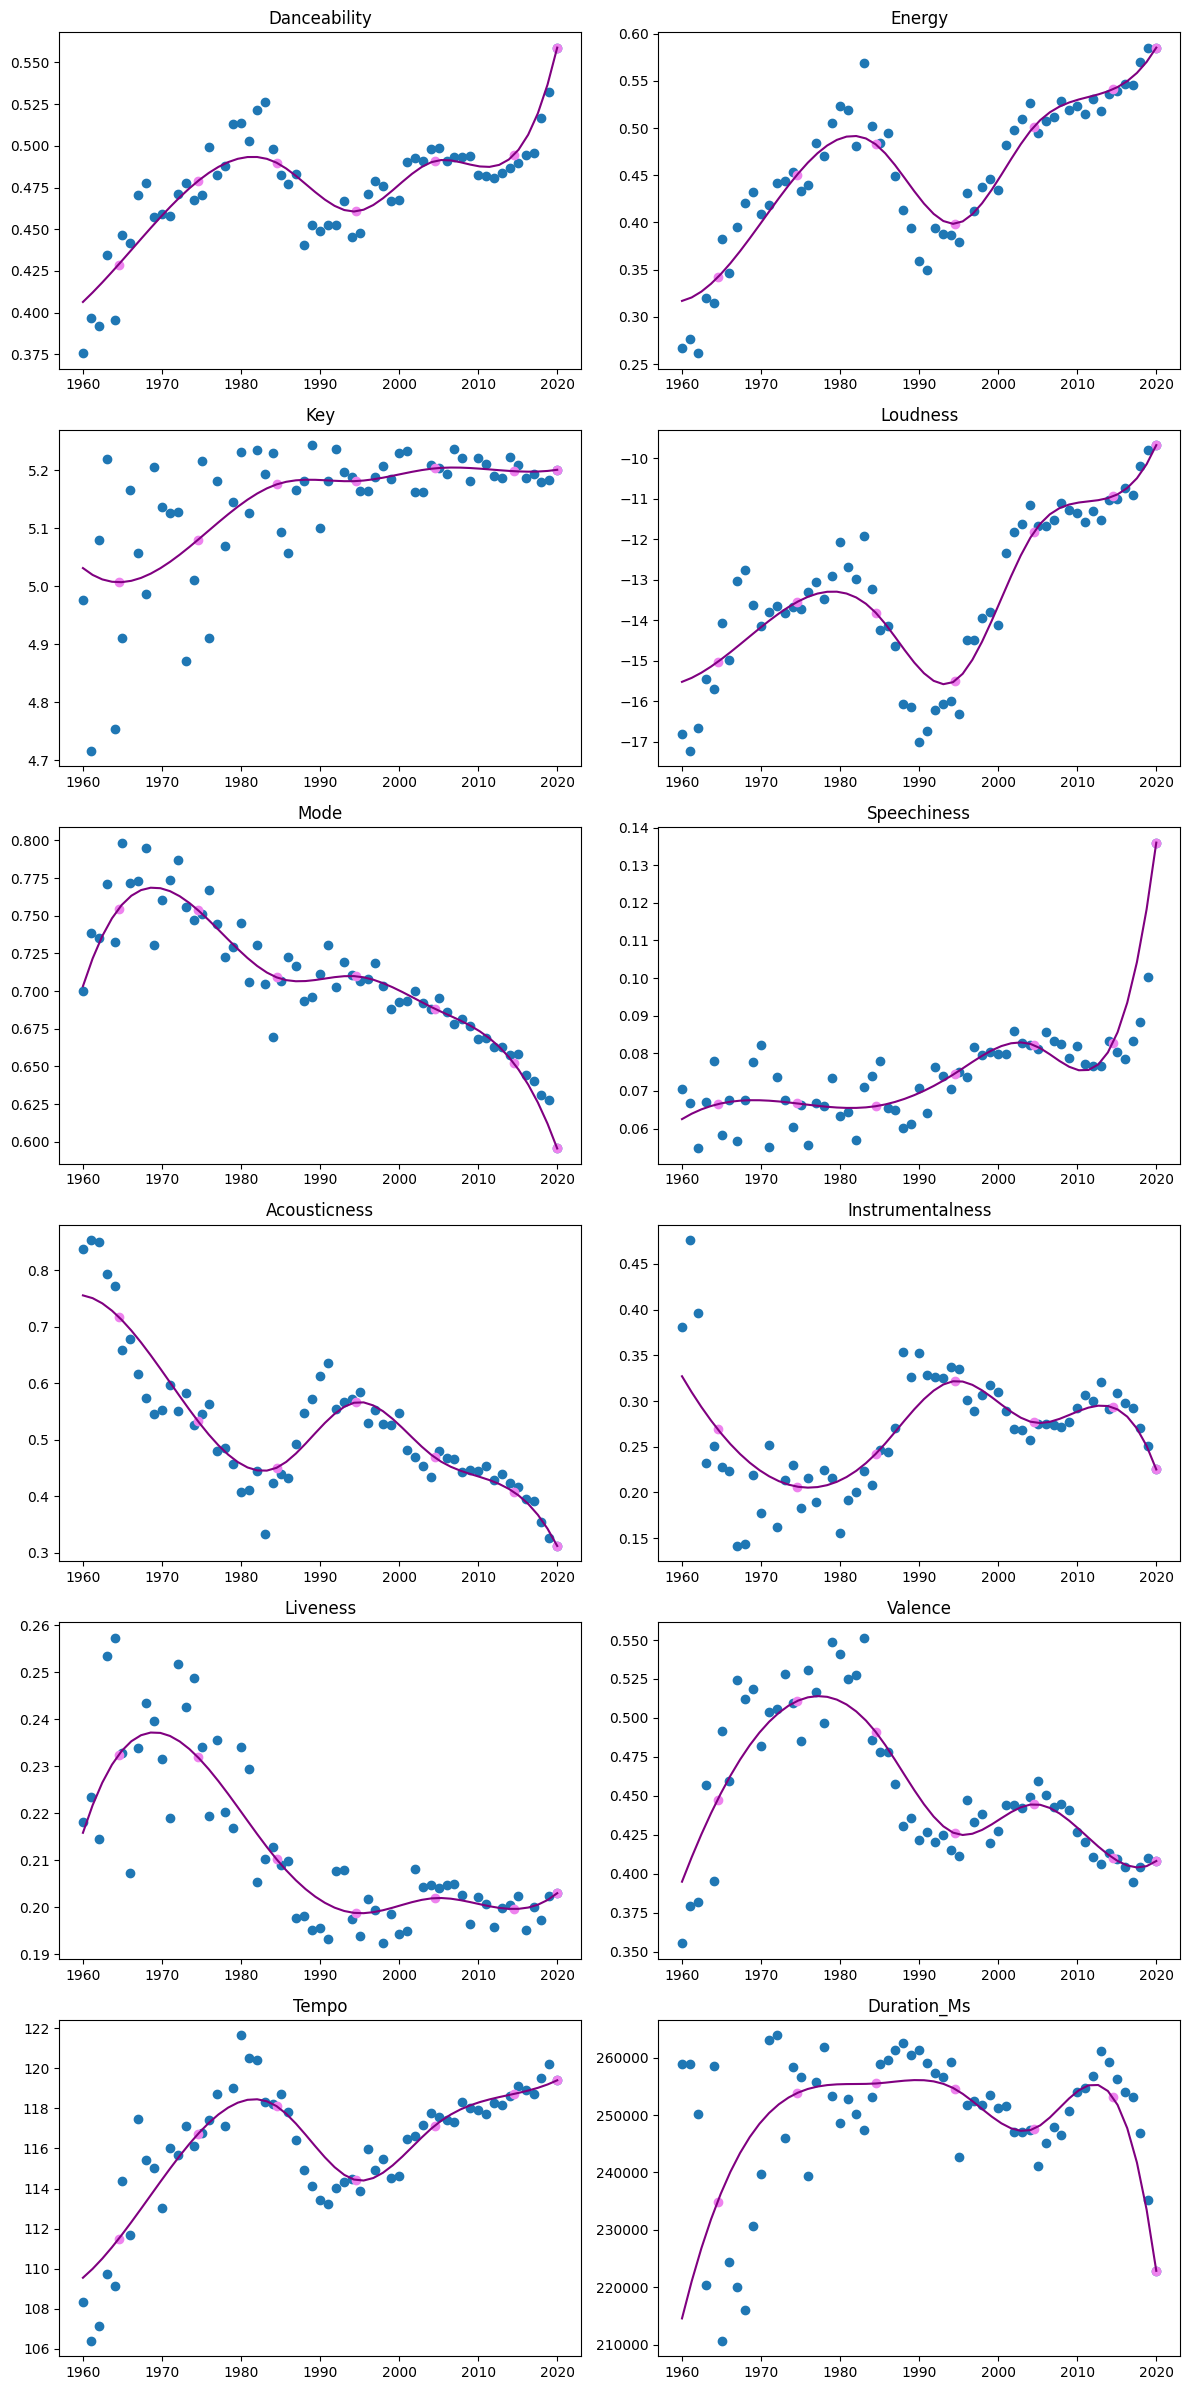

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
# Filter songs data for years starting from 1960
songs_filtered = songs[songs['year'] >= 1960]

# Select relevant attributes for analysis
attributes = list(songs.columns[9:21])

# Group by year and calculate mean for each attribute
songs_year = songs_filtered[['year'] + attributes].groupby('year').mean()
songs_year['year'] = songs_year.index

# Calculate decade and group by decade
songs_year['decade'] = songs_year.index // 10 % 10 * 10
songs_year['decade'] = songs_year['decade'].apply(lambda d: str(d).zfill(2))
songs_decade = songs_year.groupby('decade').mean()
songs_decade = songs_decade.sort_values(by='year')

# Calculate the number of rows and columns needed for subplots
num_attributes = len(attributes)
num_rows = (num_attributes + 1) // 2  # Add 1 to ensure at least 1 row
num_cols = min(2, num_attributes)  # Maximum 2 columns

# Create subplot grid
fig, ax = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 4))

# Flatten ax array if it's not already flat
ax = ax.flatten()

# Iterate through each attribute
for i, att in enumerate(attributes):
    # Calculate data for plotting
    data = list(songs_year[att])
    decade_data = list(songs_decade[att])
    lin = np.linspace(1960, 2020, 50)
    cs = CubicSpline(np.unique(songs_decade['year']), songs_decade[att])
    
    # Plot original data points, decade means, and interpolated curve
    ax[i].set_title(att.title())
    ax[i].scatter(songs_year['year'], data)
    ax[i].scatter(songs_decade['year'], decade_data, color='violet')
    ax[i].plot(lin, cs(lin), color='purple')

# Remove unused subplots
for j in range(num_attributes, len(ax)):
    fig.delaxes(ax[j])

# Adjust layout and display plot
plt.tight_layout()
plt.show()


### Division of explicit vs non explicit songs

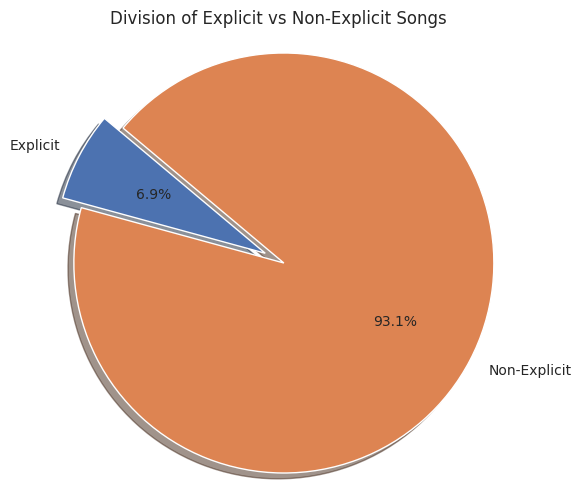

In [53]:
# Count the number of explicit and non-explicit songs
explicit_count = songs['explicit'].sum()
non_explicit_count = len(songs) - explicit_count

# Create a pie chart to visualize the division
labels = ['Explicit', 'Non-Explicit']
sizes = [explicit_count, non_explicit_count]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode the first slice (Explicit)

# Create a pie chart with a specific palette
plt.figure(figsize=(6, 6))
plt.title('Division of Explicit vs Non-Explicit Songs')
sns.set_style("whitegrid")
sns.set_palette("deep")  # Set the palette globally
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140, colors=sns.color_palette())
plt.axis('equal')
plt.show()



### Song duration mean/median 

In [55]:
import math

song_duration_mean = songs['duration_ms'].mean()
seconds=math.floor(song_duration_mean/1000)%60
if seconds < 10:
    seconds = '0' + str(seconds)
minutes=(song_duration_mean/(1000*60))%60
print ("The mean duration of songs: %d:%s" % (minutes, seconds))

The mean duration of songs: 4:08


In [57]:
song_duration_median = songs['duration_ms'].median()
seconds=math.floor(song_duration_median/1000)%60
if seconds < 10:
    seconds = '0' + str(seconds)
minutes=(song_duration_median/(1000*60))%60
print ("The median duration of songs: %d:%s" % (minutes, seconds))

The median duration of songs: 3:44


/tmp/ipykernel_697035/2569931883.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_last_10_years['duration_minutes'] = songs_last_10_years['duration_ms'] / 60000


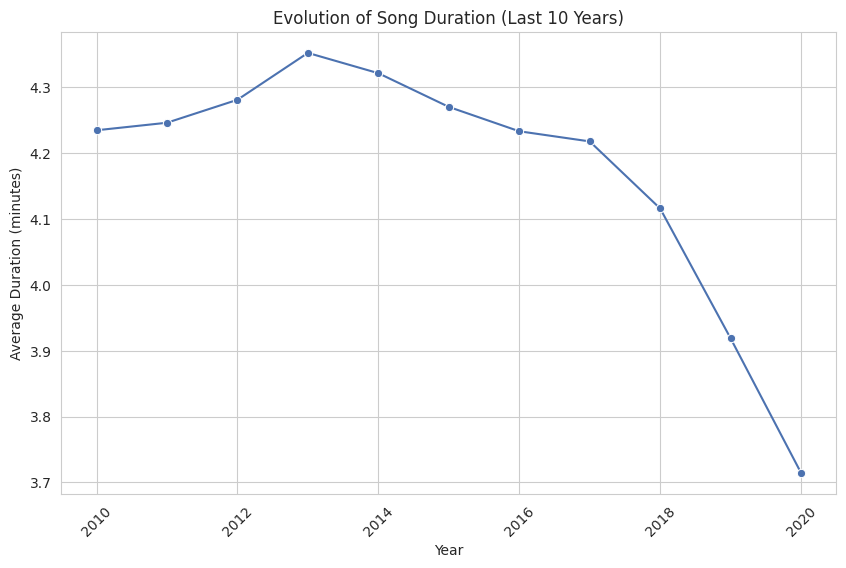

In [59]:
import seaborn as sns

# Filter songs data for the last 10 years
songs_last_10_years = songs[songs['year'] >= (songs['year'].max() - 10)]

# Convert duration from milliseconds to minutes
songs_last_10_years['duration_minutes'] = songs_last_10_years['duration_ms'] / 60000

# Group by year and calculate the average duration of songs
average_duration_by_year = songs_last_10_years.groupby('year')['duration_minutes'].mean().reset_index()

# Plot the line graph
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_duration_by_year, x='year', y='duration_minutes', marker='o')

# Set plot title and labels
plt.title('Evolution of Song Duration (Last 10 Years)')
plt.xlabel('Year')
plt.ylabel('Average Duration (minutes)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.grid(True)  # Add grid lines
plt.show()

